### DSBA Final Group Project 
#### Group Member: Yunpeng Hou | Rio Guo | Yijie Zhao

#  Bicycle Customers & Sales Analysis

### Brief Description: 
#### Boulder Expeditions is an online Biking company focused on Mountain and Touring bikes. There are two main objectives of our project: customer segmentation and predicting customer behavior. The dataset includes following features of each customer: BirthDate, MaritalStatus, Gender, AnnualIncome, TotalChildren, EducationLevel, Occupation, HomeOwner, lat, lng, OrderDate, StockDate, OrderQuantity, ProductName, ModelName, ProductCost, ProductPrice

### Objective / Solved Problem: 
#### 1.	Target marketing based on customer segmentation 
    We use K-Means to divide our customers into 4 different groups, and then marketing department employees can utilize this information to target the customers. 
#### 2.	Predict customer behavior for potential purchase
    Regression: Based on customer personal information, we can predict how much money such customers would like to spend in the future. 
#### 3.	Create a product recommendation system 
    Classification: Based on customer personal information, we can predict which bicycles s/he may be interested in buying, so we can target our customers
    with different marketing strategy. 

### Project Structure

    Data Cleaning
        ---Winsorization

    1) Unsupervised Model: K-Means
         
    2）Supervised Model: Regression 
        2.1 Data Preprocessing - One Hot Encoder
        2.2 Data Preprocessing - Standarization
        2.3 Linear Regression - OLS

    3) Supervised Model: Classification
        3.1 Classification Models
            3.1.1 Logistic Regression 
            3.1.2 K Nearest Neighbors
            3.1.3 Classification Tree
            3.1.4 Random Forest
            3.1.5 Naive Bayes 
            3.1.6 Support Vector Machine 
            3.1.7 Neural Network w/ Indentity Activation Function 
            3.1.8 Table of Prediction Score
        3.2 Model Improvement - Cross Validation
                      
    Summary          


# Data Cleaning 

In [1]:
import numpy as np
from numpy import *
from numpy import linalg as LA

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
df_ori = pd.read_csv('Bike_Customers_Products.csv',parse_dates=["StockDate","OrderDate"])
df_ori

,CustomerKey,BirthDate,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice
0,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-08,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196
1,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-28,2,Fender Set - Mountain,Fender Set - Mountain,8.2205,21.9800
2,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-19,1,"Adirondack Touring-1000 Blue, 46",Touring-1000,1481.9379,2384.0700
3,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-02,1,"Short-Sleeve Classic Put On Jersey, S",Short-Sleeve Classic Jersey,41.5723,53.9900
4,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-08-13,1,"Sport Style-100 Helmet, Red",Sport-100,13.0863,34.9900
5,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-08-07,2,Touring Tire Tube,Touring Tire Tube,1.8663,4.9900
6,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-08-06,2,Touring Tire,Touring Tire,10.8423,28.9900
7,11001,5/14/65,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2016-07-20,2016-04-27,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196
8,11001,5/14/65,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2016-07-20,2016-07-01,2,Boulder Exp Logo Cap,Cycling Cap,5.7052,8.6442
9,11001,5/14/65,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2016-07-20,2016-05-15,1,"Short-Sleeve Classic Put On Jersey, XL",Short-Sleeve Classic Jersey,41.5723,53.9900


In [4]:
print("Number of rows and columns:",df_ori.shape)
print(df_ori.columns)

Number of rows and columns: (56046, 18)
Index(['CustomerKey', 'BirthDate', 'MaritalStatus', 'Gender', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner', 'lat',
       'lng', 'OrderDate', 'StockDate', 'OrderQuantity', 'ProductName',
       'ModelName', 'ProductCost', 'ProductPrice'],
      dtype='object')


In [5]:
df_ori.dtypes

CustomerKey                int64
BirthDate                 object
MaritalStatus             object
Gender                    object
AnnualIncome               int64
TotalChildren              int64
EducationLevel            object
Occupation                object
HomeOwner                 object
lat                      float64
lng                      float64
OrderDate         datetime64[ns]
StockDate         datetime64[ns]
OrderQuantity              int64
ProductName               object
ModelName                 object
ProductCost              float64
ProductPrice             float64
dtype: object

### Select Transcations Related to Bicycles

In [6]:
df_ori["ModelName"].unique()

array(['Mountain-200', 'Fender Set - Mountain', 'Touring-1000',
       'Short-Sleeve Classic Jersey', 'Sport-100', 'Touring Tire Tube',
       'Touring Tire', 'Cycling Cap', 'Water Bottle',
       'Mountain Bottle Cage', 'Road-750', 'Road Bottle Cage',
       'Patch kit', 'Mountain Tire Tube', 'HL Mountain Tire',
       'Road Tire Tube', 'Half-Finger Gloves', 'All-Purpose Bike Stand',
       'Touring-3000', 'Racing Socks', 'ML Road Tire',
       'Hitch Rack - 4-Bike', 'LL Mountain Tire', 'LL Road Tire',
       'ML Mountain Tire', 'Long-Sleeve Logo Jersey',
       "Women's Mountain Shorts", 'Hydration Pack', 'Bike Wash',
       'Classic Vest', 'Mountain-400-W', 'Road-150', 'HL Road Tire',
       'Mountain-100', 'Road-250', 'Touring-2000', 'Mountain-500',
       'Road-350-W', 'Road-550-W', 'Road-650'], dtype=object)

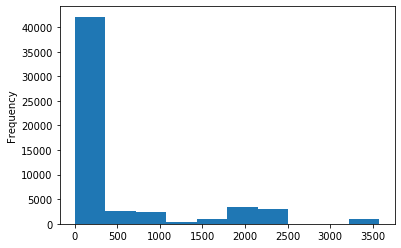

In [7]:
df_ori["ProductPrice"].plot.hist(bins=10)

In [8]:
Bicycles = ['Mountain-200', 'Touring-1000', 'Road-750', 'Touring-3000', 'Hitch Rack - 4-Bike','Mountain-400-W', 'Road-150', 
        'Mountain-100', 'Road-250','Touring-2000', 'Mountain-500', 'Road-350-W', 'Road-550-W','Road-650']

In [9]:
df = df_ori[df_ori['ModelName'].apply(lambda x: x in Bicycles)]
df.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice
0,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-08,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196
2,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-19,1,"Adirondack Touring-1000 Blue, 46",Touring-1000,1481.9379,2384.0700
7,11001,5/14/65,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2016-07-20,2016-04-27,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196
13,11001,5/14/65,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2017-06-12,2017-03-04,1,"Road Rebirth-750 Black, 44",Road-750,343.6496,539.9900
17,11002,8/12/65,M,M,60000,3,Bachelors,Professional,Y,29.8699,-89.9690,2016-07-04,2016-04-12,1,"Mountain-200 Black, 38",Mountain-200,1105.8100,2049.0982


In [10]:
df.reset_index(drop=True, inplace=True)
df.head()

,CustomerKey,BirthDate,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice
0,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-08,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196
1,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-19,1,"Adirondack Touring-1000 Blue, 46",Touring-1000,1481.9379,2384.0700
2,11001,5/14/65,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2016-07-20,2016-04-27,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196
3,11001,5/14/65,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2017-06-12,2017-03-04,1,"Road Rebirth-750 Black, 44",Road-750,343.6496,539.9900
4,11002,8/12/65,M,M,60000,3,Bachelors,Professional,Y,29.8699,-89.9690,2016-07-04,2016-04-12,1,"Mountain-200 Black, 38",Mountain-200,1105.8100,2049.0982


### Transfer BirthDate to Age

In [11]:
Year = []

for i in df["BirthDate"]:
    for j in i.split("/")[2:]:
        Year.append(j)

In [12]:
print(min(Year))
print(max(Year))

10
80


In [13]:
Age = []

for i in range(len(Year)):
    Age.append("19"+ Year[i])

In [14]:
A = pd.DataFrame(data=Age)
A = A.rename(columns={0: "Age"})
A.head()

,Age
0,1966
1,1966
2,1965
3,1965
4,1965


In [15]:
df["BirthDate"] = A["Age"]
df["BirthDate"] = pd.to_numeric(df["BirthDate"],errors='coerce')
df = df.rename(columns={"BirthDate": "Age"})
df["Age"] = 2019 - df["Age"]
df.head()

/Users/frank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/frank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CustomerKey,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice
0,11000,53,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-08,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196
1,11000,53,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-19,1,"Adirondack Touring-1000 Blue, 46",Touring-1000,1481.9379,2384.0700
2,11001,54,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2016-07-20,2016-04-27,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196
3,11001,54,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2017-06-12,2017-03-04,1,"Road Rebirth-750 Black, 44",Road-750,343.6496,539.9900
4,11002,54,M,M,60000,3,Bachelors,Professional,Y,29.8699,-89.9690,2016-07-04,2016-04-12,1,"Mountain-200 Black, 38",Mountain-200,1105.8100,2049.0982


In [16]:
print(df["Age"].max())

df = df.loc[df["Age"] <= 90,:]

109


### Create Profit Margin & Inventory Turnover Column

In [17]:
df["ProfitMargin"]=df["ProductPrice"]-df["OrderQuantity"]*df["ProductCost"]
df["Inventory_Turnover"]=df["OrderDate"]-df["StockDate"]
df['Inventory_Turnover'] = df['Inventory_Turnover'].dt.days.astype('int64')

In [18]:
df[["ProfitMargin"]] = df[["ProfitMargin"]].round(2)
df.head()

,CustomerKey,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice,ProfitMargin,Inventory_Turnover
0,11000,53,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-08,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196,953.56,105
1,11000,53,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-19,1,"Adirondack Touring-1000 Blue, 46",Touring-1000,1481.9379,2384.0700,902.13,46
2,11001,54,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2016-07-20,2016-04-27,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196,953.56,84
3,11001,54,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2017-06-12,2017-03-04,1,"Road Rebirth-750 Black, 44",Road-750,343.6496,539.9900,196.34,100
4,11002,54,M,M,60000,3,Bachelors,Professional,Y,29.8699,-89.9690,2016-07-04,2016-04-12,1,"Mountain-200 Black, 38",Mountain-200,1105.8100,2049.0982,943.29,83


### Check whether Exist Missing Values

In [19]:
df.isnull().sum()

CustomerKey            0
Age                    0
MaritalStatus          0
Gender                84
AnnualIncome           0
TotalChildren          0
EducationLevel         0
Occupation             0
HomeOwner              0
lat                    0
lng                    0
OrderDate              0
StockDate              0
OrderQuantity          0
ProductName            0
ModelName              0
ProductCost            0
ProductPrice           0
ProfitMargin           0
Inventory_Turnover     0
dtype: int64

### Delete Missing Values

In [20]:
df.dropna(subset=['Gender'], inplace=True)

In [21]:
df.isnull().sum()

CustomerKey           0
Age                   0
MaritalStatus         0
Gender                0
AnnualIncome          0
TotalChildren         0
EducationLevel        0
Occupation            0
HomeOwner             0
lat                   0
lng                   0
OrderDate             0
StockDate             0
OrderQuantity         0
ProductName           0
ModelName             0
ProductCost           0
ProductPrice          0
ProfitMargin          0
Inventory_Turnover    0
dtype: int64

### Data Was Cleaned

In [22]:
df.head()

,CustomerKey,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice,ProfitMargin,Inventory_Turnover
0,11000,53,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-08,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196,953.56,105
1,11000,53,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-19,1,"Adirondack Touring-1000 Blue, 46",Touring-1000,1481.9379,2384.0700,902.13,46
2,11001,54,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2016-07-20,2016-04-27,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196,953.56,84
3,11001,54,S,M,60000,3,Bachelors,Professional,N,41.0301,-124.1095,2017-06-12,2017-03-04,1,"Road Rebirth-750 Black, 44",Road-750,343.6496,539.9900,196.34,100
4,11002,54,M,M,60000,3,Bachelors,Professional,Y,29.8699,-89.9690,2016-07-04,2016-04-12,1,"Mountain-200 Black, 38",Mountain-200,1105.8100,2049.0982,943.29,83


In [23]:
print("Number of rows and columns:",df.shape)
print(df.columns)

Number of rows and columns: (14138, 20)
Index(['CustomerKey', 'Age', 'MaritalStatus', 'Gender', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner', 'lat',
       'lng', 'OrderDate', 'StockDate', 'OrderQuantity', 'ProductName',
       'ModelName', 'ProductCost', 'ProductPrice', 'ProfitMargin',
       'Inventory_Turnover'],
      dtype='object')


In [24]:
df.dtypes

CustomerKey                    int64
Age                            int64
MaritalStatus                 object
Gender                        object
AnnualIncome                   int64
TotalChildren                  int64
EducationLevel                object
Occupation                    object
HomeOwner                     object
lat                          float64
lng                          float64
OrderDate             datetime64[ns]
StockDate             datetime64[ns]
OrderQuantity                  int64
ProductName                   object
ModelName                     object
ProductCost                  float64
ProductPrice                 float64
ProfitMargin                 float64
Inventory_Turnover             int64
dtype: object

### Winsorization

In [25]:
df.select_dtypes(include=['int64',"float64"]).columns

Index(['CustomerKey', 'Age', 'AnnualIncome', 'TotalChildren', 'lat', 'lng',
       'OrderQuantity', 'ProductCost', 'ProductPrice', 'ProfitMargin',
       'Inventory_Turnover'],
      dtype='object')

In [26]:
def winsorize(data):
    quantiles = data.quantile([0.05, 0.95])
    q_05 = quantiles.loc[0.05]
    q_95 = quantiles.loc[0.95]
    out = np.where(data.values <= q_05,q_05, np.where(data.values >= q_95, q_95, data.values))
    return out

In [27]:
winsorize_list = ['Age', 'AnnualIncome', 'TotalChildren', 'lat', 'lng','ProfitMargin','Inventory_Turnover']

In [28]:
for index, column in df.iteritems():
    if index in winsorize_list:
        df[index] = winsorize(column)

### Test of Winsorization

In [29]:
print(df['Age'].max())
print(df['Age'].quantile(0.95))

75.0
75.0


In [30]:
df.head(10)

,CustomerKey,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice,ProfitMargin,Inventory_Turnover
0,11000,53.0,M,M,90000.0,2.0,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-08,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196,953.56,105.0
1,11000,53.0,M,M,90000.0,2.0,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-19,1,"Adirondack Touring-1000 Blue, 46",Touring-1000,1481.9379,2384.0700,902.13,46.0
2,11001,54.0,S,M,60000.0,3.0,Bachelors,Professional,N,41.0301,-121.7872,2016-07-20,2016-04-27,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196,953.56,84.0
3,11001,54.0,S,M,60000.0,3.0,Bachelors,Professional,N,41.0301,-121.7872,2017-06-12,2017-03-04,1,"Road Rebirth-750 Black, 44",Road-750,343.6496,539.9900,196.34,100.0
4,11002,54.0,M,M,60000.0,3.0,Bachelors,Professional,Y,29.8699,-89.9690,2016-07-04,2016-04-12,1,"Mountain-200 Black, 38",Mountain-200,1105.8100,2049.0982,943.29,83.0
5,11002,54.0,M,M,60000.0,3.0,Bachelors,Professional,Y,29.8699,-89.9690,2016-08-27,2016-04-28,1,"Adirondack Touring-1000 Yellow, 46",Touring-1000,1481.9379,2384.0700,902.13,118.0
6,11003,51.0,S,F,70000.0,0.0,Bachelors,Professional,N,42.2594,-98.3438,2016-07-09,2016-06-17,1,"Mountain-200 Black, 42",Mountain-200,1105.8100,2049.0982,943.29,23.0
7,11003,51.0,S,F,70000.0,0.0,Bachelors,Professional,N,42.2594,-98.3438,2016-11-11,2016-09-17,1,"Adirondack Touring-1000 Yellow, 60",Touring-1000,1481.9379,2384.0700,902.13,55.0
8,11004,51.0,S,F,80000.0,5.0,Bachelors,Professional,Y,39.1831,-75.8533,2016-07-26,2016-06-18,1,"Mountain-200 Silver, 42",Mountain-200,1117.8559,2071.4196,953.56,38.0
9,11004,51.0,S,F,80000.0,5.0,Bachelors,Professional,Y,39.1831,-75.8533,2016-11-02,2016-09-28,1,"Adirondack Touring-1000 Yellow, 50",Touring-1000,1481.9379,2384.0700,902.13,35.0


In [31]:
print("Number of rows and columns:",df.shape)
print(df.columns)

Number of rows and columns: (14138, 20)
Index(['CustomerKey', 'Age', 'MaritalStatus', 'Gender', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner', 'lat',
       'lng', 'OrderDate', 'StockDate', 'OrderQuantity', 'ProductName',
       'ModelName', 'ProductCost', 'ProductPrice', 'ProfitMargin',
       'Inventory_Turnover'],
      dtype='object')


In [32]:
df.dtypes

CustomerKey                    int64
Age                          float64
MaritalStatus                 object
Gender                        object
AnnualIncome                 float64
TotalChildren                float64
EducationLevel                object
Occupation                    object
HomeOwner                     object
lat                          float64
lng                          float64
OrderDate             datetime64[ns]
StockDate             datetime64[ns]
OrderQuantity                  int64
ProductName                   object
ModelName                     object
ProductCost                  float64
ProductPrice                 float64
ProfitMargin                 float64
Inventory_Turnover           float64
dtype: object

# 1) Unsupervised Model - KMeans

In [33]:
frequency = df_ori.groupby(['CustomerKey']).count() 
frequency.head()

,BirthDate,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice
CustomerKey,,,,,,,,,,,,,,,,,
11000,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
11001,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
11002,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
11003,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
11004,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [34]:
df_kmeans_ori = df_ori.merge(frequency["BirthDate"],on="CustomerKey")
df_kmeans_ori = df_kmeans_ori.rename(columns={"BirthDate_x":"Age","BirthDate_y":"Frequency"})
df_kmeans_ori.head()

,CustomerKey,Age,MaritalStatus,Gender,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,lat,lng,OrderDate,StockDate,OrderQuantity,ProductName,ModelName,ProductCost,ProductPrice,Frequency
0,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-08,1,"Mountain-200 Silver, 38",Mountain-200,1117.8559,2071.4196,7
1,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-07-22,2016-04-28,2,Fender Set - Mountain,Fender Set - Mountain,8.2205,21.9800,7
2,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-19,1,"Adirondack Touring-1000 Blue, 46",Touring-1000,1481.9379,2384.0700,7
3,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-09-02,1,"Short-Sleeve Classic Put On Jersey, S",Short-Sleeve Classic Jersey,41.5723,53.9900,7
4,11000,4/8/66,M,M,90000,2,Bachelors,Professional,Y,31.8857,-100.2954,2016-11-04,2016-08-13,1,"Sport Style-100 Helmet, Red",Sport-100,13.0863,34.9900,7


In [35]:
#df = df.groupby('CustomerKey',group_keys=False).apply(lambda x: x.loc[x.ProductPrice.idxmax()])
#df

In [36]:
#df_groupby = df.groupby(['CustomerKey']).sum()
#df_groupby["Frequency_real"] = sqrt(df_groupby["Frequency"])
#df_groupby

In [37]:
numeric_features = df_kmeans_ori.groupby(["CustomerKey","Frequency"])[["ProductPrice"]].sum()
numeric_features = numeric_features.reset_index()
numeric_features.head(10)

,CustomerKey,Frequency,ProductPrice
0,11000,7,4600.4296
1,11001,10,2758.6280
2,11002,3,4466.8124
3,11003,8,4493.0624
4,11004,5,4546.1038
5,11005,5,4497.7696
6,11007,7,4563.7724
7,11008,6,4485.4282
8,11009,4,4469.1024
9,11010,3,4441.8124


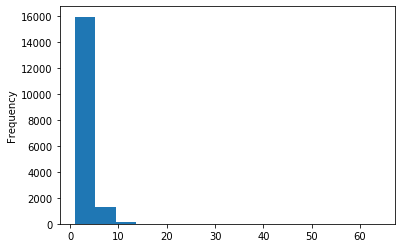

In [38]:
# Data Visualization 
numeric_features['Frequency'].plot.hist(bins=15)

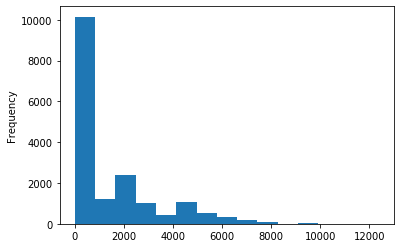

In [39]:
numeric_features['ProductPrice'].plot.hist(bins=15)

In [40]:
# Standardization 
df_kmeans = numeric_features.copy()
df_temp= numeric_features.copy()
df_kmeans['index_col'] = numeric_features.index.astype('int64')
df_temp['index_col'] = numeric_features.index.astype('int64')
df_kmeans["Frequency_std"]=(df_kmeans[["Frequency"]]-df_kmeans["Frequency"].mean())/df_kmeans[["Frequency"]].std()
df_kmeans["Frequency_std"].head(10)

0    1.520473
1    2.726583
2   -0.087674
3    1.922509
4    0.716399
5    0.716399
6    1.520473
7    1.118436
8    0.314362
9   -0.087674
Name: Frequency_std, dtype: float64

In [41]:
df_kmeans["ProductPrice_std"] = (df_kmeans[["ProductPrice"]]-df_kmeans["ProductPrice"].mean())/df_kmeans[["ProductPrice"]].std()
df_kmeans["ProductPrice_std"].head(10)

0    1.688184
1    0.712807
2    1.617424
3    1.631325
4    1.659415
5    1.633818
6    1.668771
7    1.627282
8    1.618636
9    1.604184
Name: ProductPrice_std, dtype: float64

In [42]:
X = df_kmeans.loc[:, ["index_col","Frequency_std", "ProductPrice_std"]].values
X[:,1:3]

array([[ 1.5204725 ,  1.68818424],
       [ 2.72658259,  0.71280715],
       [-0.08767429,  1.61742355],
       ...,
       [-0.89174768,  1.03921873],
       [-0.89174768,  0.33705597],
       [-0.89174768,  0.33705597]])

In [43]:
m=X.shape[0] 
n=X.shape[1]-1
n_iter=100
Centroids=np.array([]).reshape(n,0) 
K=4

In [44]:
import random as rd
rd.seed(10)

for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[:,1:3][rand]]

In [45]:
Output={}

for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X[:,1:3]-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
    
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(3,0)
     
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
        
    for k in range(K):
        Y[k+1]=Y[k+1].T        
    for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1][:,1:3],axis=0)
    Output=Y

### Original Dataset 

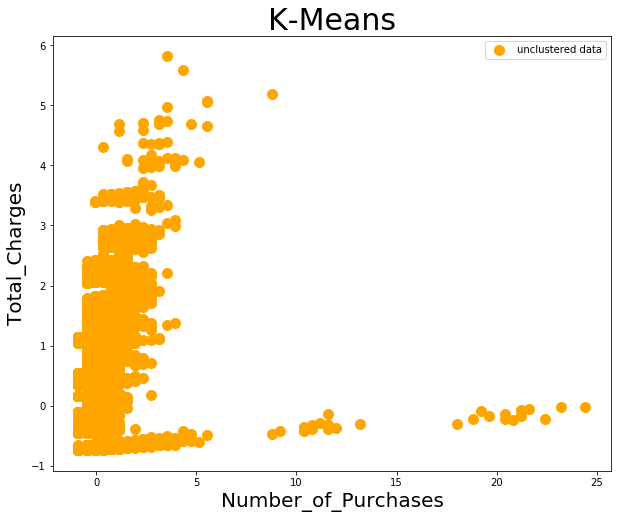

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.scatter(X[:,1],X[:,2],c='orange',label='unclustered data',s=100)
plt.xlabel('Number_of_Purchases', size=20)
plt.ylabel('Total_Charges', size=20)
plt.legend()
plt.title('K-Means', size=30)
plt.show()

### Clustering Dataset

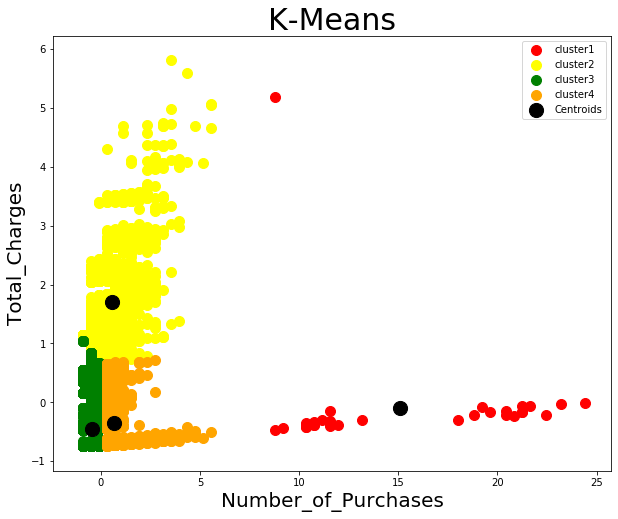

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

color=['red','yellow','green','orange']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,1],Output[k+1][:,2],c=color[k],label=labels[k],s=100)
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c='black',label='Centroids')
plt.xlabel('Number_of_Purchases', size=20)
plt.ylabel('Total_Charges', size=20)
plt.legend(loc="upper right")
plt.title('K-Means', size=30)
plt.show()

### > Cluster1 (Red): For lower charges and higher tenure, they are Retained Customers so that we can consider outsource option or cut the tail.
### > Cluster2 (Yellow): For higher charges and lower tenure, they are Potential Customers so that we can continue the current customer treatment strategy.
### > Cluster3 (Green): For lower charges and lower tenure, they are Hibernators so that we can ignite sales via cross-sale/upscale offers and have higher touch and personalization.
### > Cluster4 (Orange): For moderate charges and moderate tenure, they are also Potential Customers but we need to build a swat team. Consider 1:1 rep to the customer to reduce risk.

## Assign Label to Each Cluster

In [48]:
ds=pd.DataFrame.from_dict(Output,orient='index')

def give_label(i):
    g=ds.iloc[i][0]
    g_label=(i+1)*ones(len(g)).reshape(len(g),1)
    return concatenate((g,g_label), axis=1)

arr_kmeans=concatenate((give_label(0),give_label(1),give_label(2),give_label(3)),axis=0)
df_kmeans=pd.DataFrame(arr_kmeans,columns=['index_col','Frequency','ProductPrice','Clustering label'])
df_kmeans["Frequency"] = df_kmeans["Frequency"] * numeric_features["Frequency"].std() + numeric_features["Frequency"].mean()
df_kmeans["ProductPrice"] = df_kmeans["ProductPrice"] * numeric_features["ProductPrice"].std() + numeric_features["ProductPrice"].mean()
df_kmeans['Frequency'] = df_kmeans['Frequency'].astype(({'Frequency': 'int64'}))
df_kmeans['index_col'] = df_kmeans['index_col'].astype(({'index_col': 'int64'}))
df_kmeans['Clustering label'] = df_kmeans['Clustering label'].astype(({'Clustering label': 'str'}))

df_kmeans=df_kmeans.set_index('index_col').sort_index()
df_kmeans=pd.merge(df_kmeans['Clustering label'],df_temp,on=['index_col'])

In [49]:
df_kmeans=df_kmeans.iloc[:,1:5]
df_kmeans

,Clustering label,CustomerKey,Frequency,ProductPrice
0,2.0,11000,7,4600.4296
1,4.0,11001,10,2758.6280
2,2.0,11002,3,4466.8124
3,2.0,11003,8,4493.0624
4,2.0,11004,5,4546.1038
5,2.0,11005,5,4497.7696
6,2.0,11007,7,4563.7724
7,2.0,11008,6,4485.4282
8,2.0,11009,4,4469.1024
9,2.0,11010,3,4441.8124


### As we can see from above table, all customers were assgined back into 4 different groups and we can use above strategy that I mentioned before. 

# 2) Supervised Model - Regression

## Prediction: ProfitMargin

### 2.1) Data Preprocessing - One Hot Encoder

In [50]:
from sklearn.preprocessing import OneHotEncoder 

In [51]:
Features = df[['MaritalStatus', 'Gender', 'EducationLevel', 'Occupation', 'HomeOwner','ModelName']].values

In [52]:
enc = OneHotEncoder()

encFeatures = enc.fit_transform(Features).toarray()
encFeatures = pd.DataFrame(data=encFeatures)
encFeatures

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 2.2) Data Preprocessing - Standarization

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
data = df[['Age', 'AnnualIncome', 'TotalChildren', 'lat', 'lng']]
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
print(scaler.mean_) # Mean
print("")
print(scaler.scale_) # Standard Deviation 

[ 5.63433300e+01  6.09046541e+04  1.64641392e+00  3.85521430e+01
 -9.15856591e+01]

[9.36687773e+00 3.12491952e+04 1.50468273e+00 4.90200780e+00
 1.33840701e+01]


In [56]:
Std = scaler.transform(data)
Std

array([[-0.35693111,  0.93107505,  0.23499046, -1.35994134, -0.65075427],
       [-0.35693111,  0.93107505,  0.23499046, -1.35994134, -0.65075427],
       [-0.25017195, -0.02894968,  0.89958239,  0.50549837, -2.25652888],
       ...,
       [ 0.28362385, -0.9889744 ,  0.89958239, -0.46096276, -0.40667307],
       [ 0.39038301, -0.9889744 ,  0.89958239, -1.87018532,  0.7475274 ],
       [ 0.39038301, -0.9889744 , -1.09419341, -1.23795051, -0.45835391]])

In [57]:
Std = pd.DataFrame(data=Std)
Std.columns = ['Age', 'AnnualIncome', 'TotalChildren', 'lat', 'lng']
Std.head()

,Age,AnnualIncome,TotalChildren,lat,lng
0,-0.356931,0.931075,0.234990,-1.359941,-0.650754
1,-0.356931,0.931075,0.234990,-1.359941,-0.650754
2,-0.250172,-0.028950,0.899582,0.505498,-2.256529
3,-0.250172,-0.028950,0.899582,0.505498,-2.256529
4,-0.250172,-0.028950,0.899582,-1.771161,0.120790


In [58]:
Regression_Data = pd.concat([encFeatures, Std], axis=1, sort=False)
Regression_Data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Age,AnnualIncome,TotalChildren,lat,lng
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.356931,0.931075,0.234990,-1.359941,-0.650754
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.356931,0.931075,0.234990,-1.359941,-0.650754
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.250172,-0.028950,0.899582,0.505498,-2.256529
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.250172,-0.028950,0.899582,0.505498,-2.256529
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.250172,-0.028950,0.899582,-1.771161,0.120790
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.250172,-0.028950,0.899582,-1.771161,0.120790
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.570449,0.291059,-1.094193,0.756273,-0.504939
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.570449,0.291059,-1.094193,0.756273,-0.504939
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.570449,0.611067,2.228766,0.128714,1.175454
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.570449,0.611067,2.228766,0.128714,1.175454


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Regression_Data,df["ProfitMargin"], test_size=0.33, random_state=10)

### 2.3) Linear Regression - OLS

In [60]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [61]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
reg.coef_

array([ 5.79358250e+09,  5.79358250e+09, -4.26347661e+12, -4.26347661e+12,
       -2.07486893e+12, -2.07486893e+12, -2.07486893e+12, -2.07486893e+12,
       -2.07486893e+12,  1.22773116e+12,  1.22773116e+12,  1.22773116e+12,
        1.22773116e+12,  1.22773116e+12, -1.09583785e+11, -1.09583785e+11,
        4.46851744e+11,  4.46851745e+11,  4.46851745e+11,  4.46851744e+11,
        4.46851744e+11,  4.46851745e+11,  4.46851745e+11,  4.46851744e+11,
        4.46851744e+11,  4.46851744e+11,  4.46851744e+11,  4.46851745e+11,
        4.46851744e+11,  4.46851744e+11,  6.51034761e-02, -4.49968704e-01,
        2.08260248e-02, -1.01764845e-01, -1.02183155e-01])

In [63]:
reg.predict(X_test)

array([ 902.00195312,  459.70800781,  876.25292969, ...,  949.18652344,
        196.89453125, 1406.92382812])

In [64]:
reg.score(X_test, y_test)

0.9992563015879975

### Conclusion: The regression outcome we predict is ProfitMargin. Based on the demographic information, we have linear regression model - OLS. Therefore, for future customers, once we collected such information, we can predict that the affordability of potential customers so that we can arrange such customer into corresponding groups, as well as we can have similar strategy that we used in K-Means. 

# 3) Supervised Model - Classfication

## Prediction: ModelName

### 3.1) Classification Models

In [65]:
from sklearn.preprocessing import OneHotEncoder   

In [66]:
Features = df[['MaritalStatus', 'Gender', 'EducationLevel', 'Occupation', 'HomeOwner']].values

In [67]:
enc = OneHotEncoder()

encFeatures = enc.fit_transform(Features).toarray()
encFeatures = pd.DataFrame(data=encFeatures)
encFeatures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
data = df[['Age', 'AnnualIncome', 'TotalChildren', 'lat', 'lng','ProductPrice']]
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
print(scaler.mean_) # Mean
print("")
print(scaler.scale_) # Standard Deviation 

[ 5.63433300e+01  6.09046541e+04  1.64641392e+00  3.85521430e+01
 -9.15856591e+01  1.66326443e+03]

[9.36687773e+00 3.12491952e+04 1.50468273e+00 4.90200780e+00
 1.33840701e+01 8.70252522e+02]


In [71]:
Std = scaler.transform(data)
Std

array([[-0.35693111,  0.93107505,  0.23499046, -1.35994134, -0.65075427,
         0.46900774],
       [-0.35693111,  0.93107505,  0.23499046, -1.35994134, -0.65075427,
         0.82827174],
       [-0.25017195, -0.02894968,  0.89958239,  0.50549837, -2.25652888,
         0.46900774],
       ...,
       [ 0.28362385, -0.9889744 ,  0.89958239, -0.46096276, -0.40667307,
         1.96692975],
       [ 0.39038301, -0.9889744 ,  0.89958239, -1.87018532,  0.7475274 ,
         0.44335841],
       [ 0.39038301, -0.9889744 , -1.09419341, -1.23795051, -0.45835391,
         0.44335841]])

In [72]:
Std = pd.DataFrame(data=Std)
Std.columns = ['Age', 'AnnualIncome', 'TotalChildren', 'lat', 'lng','ProductPrice']
Std.head()

,Age,AnnualIncome,TotalChildren,lat,lng,ProductPrice
0,-0.356931,0.931075,0.234990,-1.359941,-0.650754,0.469008
1,-0.356931,0.931075,0.234990,-1.359941,-0.650754,0.828272
2,-0.250172,-0.028950,0.899582,0.505498,-2.256529,0.469008
3,-0.250172,-0.028950,0.899582,0.505498,-2.256529,-1.290745
4,-0.250172,-0.028950,0.899582,-1.771161,0.120790,0.443358


In [73]:
Classification_Data = pd.concat([encFeatures, Std], axis=1, sort=False)
Classification_Data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,Age,AnnualIncome,TotalChildren,lat,lng,ProductPrice
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.356931,0.931075,0.234990,-1.359941,-0.650754,0.469008
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.356931,0.931075,0.234990,-1.359941,-0.650754,0.828272
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.250172,-0.028950,0.899582,0.505498,-2.256529,0.469008
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.250172,-0.028950,0.899582,0.505498,-2.256529,-1.290745
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.250172,-0.028950,0.899582,-1.771161,0.120790,0.443358
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.250172,-0.028950,0.899582,-1.771161,0.120790,0.828272
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.570449,0.291059,-1.094193,0.756273,-0.504939,0.443358
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.570449,0.291059,-1.094193,0.756273,-0.504939,0.828272
8,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.570449,0.611067,2.228766,0.128714,1.175454,0.469008
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.570449,0.611067,2.228766,0.128714,1.175454,0.828272


In [74]:
enc_features = OneHotEncoder.get_feature_names(enc)
enc_features = np.append(enc_features, 'Age')
enc_features = np.append(enc_features, 'AnnualIncome')
enc_features = np.append(enc_features, 'TotalChildren')
enc_features = np.append(enc_features, 'lat')
enc_features = np.append(enc_features, 'lng')
enc_features = np.append(enc_features, 'ProductPrice')
enc_features

array(['x0_M', 'x0_S', 'x1_F', 'x1_M', 'x2_Bachelors',
       'x2_Graduate Degree', 'x2_High School', 'x2_Partial College',
       'x2_Partial High School', 'x3_Clerical', 'x3_Management',
       'x3_Manual', 'x3_Professional', 'x3_Skilled Manual', 'x4_N',
       'x4_Y', 'Age', 'AnnualIncome', 'TotalChildren', 'lat', 'lng',
       'ProductPrice'], dtype=object)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Classification_Data,df["ModelName"], test_size=0.33, random_state=10)

### 3.1.1) Logistic Regression

# ![Logistic Regression Formula](LR1.png)

In [76]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=6.0, solver="lbfgs",multi_class='multinomial',max_iter=10000000,random_state=10)

In [77]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=6.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,Age,AnnualIncome,TotalChildren,lat,lng,ProductPrice
2447,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.143413,0.291059,-1.094193,0.424960,0.031467,0.828272
1091,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.283624,-0.028950,-0.429601,-0.018042,0.508699,-0.515269
5769,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,-0.250172,-0.988974,0.234990,0.661414,-0.023576,0.595572
2180,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,-0.570449,-0.028950,0.234990,0.476306,0.998736,0.469008
12615,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.036654,-0.028950,0.899582,0.893931,-0.164945,0.443358


In [79]:
log_reg.predict(X_test)

array(['Touring-1000', 'Road-550-W', 'Road-250', ..., 'Mountain-200',
       'Road-750', 'Road-150'], dtype=object)

In [80]:
logreg_s=log_reg.score(X_test, y_test)
logreg_s

0.8420488641234463

### 3.1.2) K-Nearest Neighbors

In [81]:
from sklearn import neighbors

In [82]:
# We aim to select optimal K value that yields the highest accuracy
# Assume the range of k is from 1 to 100 in integer
# Returns a sequence of integers for k from 1 to 100
k_range = range(1,101) 
scores_list=[]

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,algorithm='auto',leaf_size=80,p=2) 
    knn.fit(X_train, y_train)
    
    scores_list.append(knn.score(X_test, y_test))

Text(0, 0.5, 'Accuracy score')

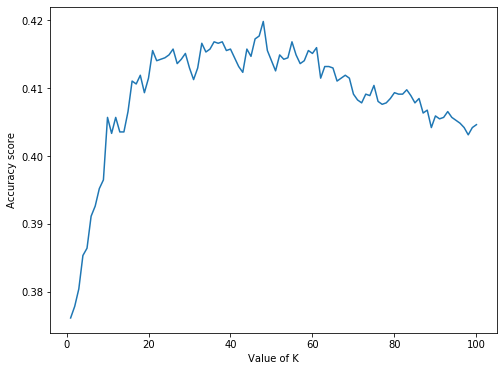

In [83]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

#Make a plot showing accuracy scores vs their corresponding k value
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy score')

In [84]:
#Indexing the point with highest accuracy score, which also has the optimal k value selection
Accuracy_highest = max(scores_list)
K_HighestAccuracy = k_range[scores_list.index(Accuracy_highest)]
print ("Optimal K is",K_HighestAccuracy, "with highest accuracy =",Accuracy_highest)

Optimal K is 48 with highest accuracy = 0.41984569224174884


In [85]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=48,algorithm='auto',leaf_size=80,p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=80, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=48, p=2,
                     weights='uniform')

In [86]:
knn.predict(X_test)

array(['Mountain-200', 'Road-550-W', 'Road-250', ..., 'Mountain-200',
       'Road-750', 'Road-150'], dtype=object)

In [87]:
knn_s=knn.score(X_test,y_test)
knn_s

0.41984569224174884

### 3.1.3) Classification Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
Cat_tree = DecisionTreeClassifier(criterion='entropy', presort=True, max_depth=6, min_impurity_decrease=0.005, splitter='best',random_state=10)

In [89]:
Cat_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=10, splitter='best')

In [90]:
Cat_tree.predict(X_test)

array(['Touring-1000', 'Touring-2000', 'Road-250', ..., 'Mountain-200',
       'Road-750', 'Road-150'], dtype=object)

In [91]:
class_s = Cat_tree.score(X_test,y_test)
class_s

0.9802828975567939

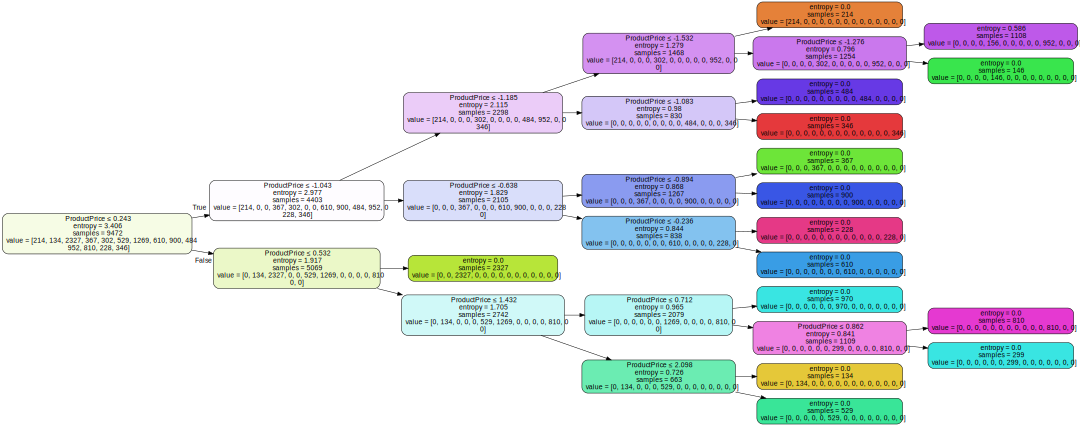

In [92]:
import graphviz
import pydotplus

dot_data = tree.export_graphviz(Cat_tree, feature_names=enc_features, filled=True, rounded=True, special_characters=True, rotate=True, impurity=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"15,20!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

### 3.1.4) Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
randomforest = RandomForestClassifier(criterion='entropy', n_estimators=60, max_depth=30, min_samples_leaf=4, min_impurity_decrease=0.0001,n_jobs=1, 
                                      random_state=10)

In [95]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [96]:
randomforest.predict(X_test)

array(['Touring-1000', 'Touring-2000', 'Road-250', ..., 'Mountain-200',
       'Road-750', 'Road-150'], dtype=object)

In [97]:
rf_s = randomforest.score(X_test,y_test)
rf_s

0.8694813544792113

### 3.1.5) Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
NaiveBayes = GaussianNB()

In [100]:
NaiveBayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
NaiveBayes.predict(X_test)

array(['Touring-1000', 'Touring-2000', 'Road-250', ..., 'Mountain-200',
       'Road-750', 'Road-150'], dtype='<U19')

In [102]:
nb_s = NaiveBayes.score(X_test,y_test)
nb_s

0.979854264894985

### 3.1.6) Support Vector Machine

In [103]:
from sklearn import svm

In [104]:
SVM = svm.LinearSVC(C=1.0,dual=True,loss='hinge',penalty='l2',max_iter=100000,random_state=10)

In [105]:
SVM.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=100000, multi_class='ovr',
          penalty='l2', random_state=10, tol=0.0001, verbose=0)

In [106]:
SVM.predict(X_test)

array(['Mountain-100', 'Road-650', 'Touring-3000', ..., 'Touring-3000',
       'Road-750', 'Road-150'], dtype=object)

In [107]:
svm_s = SVM.score(X_test,y_test)
svm_s

0.2398199742820403

### 3.1.7) Neural Network w/ Identity Activation Function

In [108]:
from sklearn.neural_network import MLPClassifier
#Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation

NeuralNetwork = MLPClassifier(activation='identity',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,2),max_iter=2000000, random_state=10)

In [109]:
NeuralNetwork.fit(X_train,y_train)

MLPClassifier(activation='identity', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [110]:
NeuralNetwork.predict(X_test)

array(['Touring-1000', 'Touring-2000', 'Road-250', ..., 'Mountain-200',
       'Road-750', 'Road-150'], dtype='<U19')

In [111]:
neu_s = NeuralNetwork.score(X_test,y_test)
neu_s

0.9417059579939991

### 3.1.8) Table of Prediction Score

In [112]:
#Create a table for score comparison of different model of contract prediction 
scoreTable = {'Logistic Regression': [logreg_s],
'K Nearest Neighbors': [knn_s],
'Classification Tree': [class_s],
'Naive Bayes': [nb_s],
'Support Vector Machine': [svm_s],
'Neural Network-Identity': [neu_s],
"Random Forest":[rf_s]}

scoreTable = pd.DataFrame(scoreTable)
scoreTable["Classification_Model"] = list(["Prediction_Score"])
scoreTable = scoreTable.set_index("Classification_Model")
scoreTable = scoreTable.T
scoreTable.sort_values(by="Prediction_Score",ascending=False)

Classification_Model,Prediction_Score
Classification Tree,0.980283
Naive Bayes,0.979854
Neural Network-Identity,0.941706
Random Forest,0.869481
Logistic Regression,0.842049
K Nearest Neighbors,0.419846
Support Vector Machine,0.239820


###  As we can see from above table, for classification model, we should choose Classification Tree as the score of this model is the highest, compared to others. In fact, the algorithm of KNN and SVM is calculating distances, but the algorithm of Naive Bayes and Decision Tree is calculating probability.   

### 3.2) Model Improvement - Cross Validation 

In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [114]:
ct_scores = []
y=df['ModelName']
x=Classification_Data
cv = KFold(n_splits=5, random_state=10, shuffle=False)
for train_index, test_index in cv.split(x):
    print("Train Index: ", train_index, "\n", "Test Index: ", test_index,"\n")
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    Cat_tree.fit(x_train, y_train)
    ct_scores.append(Cat_tree.score(x_test, y_test))

Train Index:  [ 2828  2829  2830 ... 14135 14136 14137] 
 Test Index:  [   0    1    2 ... 2825 2826 2827] 

Train Index:  [    0     1     2 ... 14135 14136 14137] 
 Test Index:  [2828 2829 2830 ... 5653 5654 5655] 

Train Index:  [    0     1     2 ... 14135 14136 14137] 
 Test Index:  [5656 5657 5658 ... 8481 8482 8483] 

Train Index:  [    0     1     2 ... 14135 14136 14137] 
 Test Index:  [ 8484  8485  8486 ... 11308 11309 11310] 

Train Index:  [    0     1     2 ... 11308 11309 11310] 
 Test Index:  [11311 11312 11313 ... 14135 14136 14137] 



In [115]:
np.mean(ct_scores)

0.9824604778432263

###  As we can see from model improvement through cross validation, Classification Tree Model| has better score 98.25% now, which is improved from 98.03% before. 

### Conclusion: The classification outcome we predict is the Model Name. Based on the demographic information, we choose to use Classification Tree. Therefore, for future customers, once we collect such information, we can predict the types of bicycles that is most likely to be bought by given customers. For example, for those customers who purchase expensive bicycles will definitely bring more profits to the company than customers who purchases cheaper one, and we should spend more time providing CRM (Customer Relationship Management) serivce.

# Summary

### 1）We use unsupervised model for customer segmentation through K-Means.
### 2）We use supervised regression model for predicting profits brought to the company through Linear Regression model with Ordinary Least Square.
### 3）We use supervised classification model for predicting contracts to provide better Customer Relationship Management through Classification Tree.

# Appendix

### Yunpeng Hou: 
#### Project Structure, Data Cleaning, Data Winsorization, Data Standarization, Unsupervised Model (K-Means), Supervised Model-Regression (Linear Regression-OLS), Supervised Model-Classification (7X Models), Model Improvement-Cross Validation, Summary
### Rio Guo: 
#### Classification Model Parameter Adjustment for Model Improvement, Revising Jupyter Notebook
### Yijie Zhao: 
#### Classification Model Parameter Adjustment for Model Improvement, Revising Jupyter Notebook